In [288]:
import pandas as pd
import numpy as np
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## <font color='orange'>Análisis exploratorio del dataset</font> 🔍

In [289]:
df = pd.read_csv('./Input/GSAF5.csv', delimiter = ',', encoding = "iso-8859-1", skip_blank_lines= True)
print("shape: ", df.shape)
df.head(2)

shape:  (5992, 24)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN


In [290]:
print('Column names: \n \n',df.columns)

Column names: 
 
 Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


In [291]:
## Comprobación de missing values
null_cols = df.isnull().sum()
print('Total de valores nulos y % sobre el total de filas:\n')
for col in df.columns:
    print(col,': ',int(df[col].isnull().sum()),'/',str(df[col].isnull().sum()/df.shape[0]*100)[:4], '%')
print('\nTotal nulos: ',null_cols.sum())

Total de valores nulos y % sobre el total de filas:

Case Number :  0 / 0.0 %
Date :  0 / 0.0 %
Year :  0 / 0.0 %
Type :  0 / 0.0 %
Country :  43 / 0.71 %
Area :  402 / 6.70 %
Location :  496 / 8.27 %
Activity :  527 / 8.79 %
Name :  200 / 3.33 %
Sex  :  567 / 9.46 %
Age :  2681 / 44.7 %
Injury :  27 / 0.45 %
Fatal (Y/N) :  19 / 0.31 %
Time :  3213 / 53.6 %
Species  :  2934 / 48.9 %
Investigator or Source :  15 / 0.25 %
pdf :  0 / 0.0 %
href formula :  1 / 0.01 %
href :  3 / 0.05 %
Case Number.1 :  0 / 0.0 %
Case Number.2 :  0 / 0.0 %
original order :  0 / 0.0 %
Unnamed: 22 :  5991 / 99.9 %
Unnamed: 23 :  5990 / 99.9 %

Total nulos:  23109


In [292]:
# Comprobación de duplicidad en las filas:

duplicate_rows_df = df[df.duplicated()]
print("Hay {} filas duplicadas".format(duplicate_rows_df.shape[0]))

Hay 0 filas duplicadas


In [293]:
# Comprobación del tipo de dato por columna

print("data types:\n",df.dtypes)

data types:
 Case Number               object
Date                      object
Year                       int64
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
pdf                       object
href formula              object
href                      object
Case Number.1             object
Case Number.2             object
original order             int64
Unnamed: 22               object
Unnamed: 23               object
dtype: object


In [294]:
# Comprobación de valores unicos por columna

for col in df.columns:
    print(col,'->', df[col].nunique())

Case Number -> 5976
Date -> 5128
Year -> 232
Type -> 6
Country -> 203
Area -> 785
Location -> 3929
Activity -> 1492
Name -> 5009
Sex  -> 6
Age -> 151
Injury -> 3595
Fatal (Y/N) -> 8
Time -> 357
Species  -> 1538
Investigator or Source -> 4752
pdf -> 5981
href formula -> 5980
href -> 5972
Case Number.1 -> 5975
Case Number.2 -> 5976
original order -> 5988
Unnamed: 22 -> 1
Unnamed: 23 -> 2


## <font color='orange'>Limpieza y reorganización de datos</font> 🛠

#### Modificación del nombre de determinadas columnas

In [295]:
df.rename(columns = 
{
 'Sex ': 'Sex',
    'Fatal (Y/N)': 'isFatal',
    'Species ': 'Species'
}, inplace = True
)

#### Limpieza y homogeneización de la columna `Country`  🌍

In [296]:
col = 'Country'
print('Total filas: ', df[col].size,
      '\nTotal nulos: ', df[col].isnull().sum(),
      '\nTotal poblados: ', df[col].count(),
      '\nTotal distintos: ', df[col].nunique())

Total filas:  5992 
Total nulos:  43 
Total poblados:  5949 
Total distintos:  203


In [297]:
# Establezco el tamaño de la muestra (n) de valores únicos en la columna Country 
n = 40
print('Total valores :', (df[col].value_counts().head(n)).sum())
print('Porcentaje sobre el total =', str((df[col].value_counts().head(n)).sum()/df.shape[0]*100)[:4], '%','\n')
print(df[col].value_counts().head(n))

Total valores : 5442
Porcentaje sobre el total = 90.8 % 

USA                 2116
AUSTRALIA           1279
SOUTH AFRICA         565
PAPUA NEW GUINEA     133
NEW ZEALAND          125
BRAZIL               102
BAHAMAS               98
MEXICO                81
ITALY                 71
FIJI                  62
PHILIPPINES           59
REUNION               57
NEW CALEDONIA         51
MOZAMBIQUE            44
CUBA                  42
SPAIN                 40
INDIA                 37
EGYPT                 36
CROATIA               34
PANAMA                32
JAPAN                 32
IRAN                  29
SOLOMON ISLANDS       29
GREECE                25
HONG KONG             24
JAMAICA               23
FRENCH POLYNESIA      22
INDONESIA             20
ENGLAND               19
PACIFIC OCEAN         17
BERMUDA               16
ATLANTIC OCEAN        16
TONGA                 15
VIETNAM               14
VANUATU               14
SRI LANKA             13
FRANCE                13
MARSHALL ISLANDS 

In [298]:
# Creo la lista de los 40 países con los que me voy a quedar:

l = df[col].value_counts().head(40).index.tolist()

# Defino la función pais que me va a devolver un valor dentro de la lista previamente definida si encuentra algún
# parecido en el input con el fin de homogeneizar los datos

def pais(e):
    l = ['USA', 'AUSTRALIA', 'SOUTH AFRICA', 'PAPUA NEW GUINEA', 'NEW ZEALAND', 'BRAZIL', 'BAHAMAS', 'MEXICO', 'ITALY', 'FIJI', 'PHILIPPINES', 'REUNION', 'NEW CALEDONIA', 'MOZAMBIQUE', 'CUBA', 'SPAIN', 'INDIA', 'EGYPT', 'CROATIA', 'PANAMA', 'JAPAN', 'IRAN', 'SOLOMON ISLANDS', 'GREECE', 'HONG KONG', 'JAMAICA', 'FRENCH POLYNESIA', 'INDONESIA', 'ENGLAND', 'PACIFIC OCEAN', 'ATLANTIC OCEAN', 'BERMUDA', 'TONGA', 'VANUATU', 'VIETNAM', 'FRANCE', 'MARSHALL ISLANDS', 'SRI LANKA', 'TURKEY', 'IRAQ']
    for i in l:
        result = re.search(i, str.upper(str(e)))
        if result:
            return i

In [299]:
# Aplico la función sobre un nuevo dataset df2:

df2 = df
df2['Country__c']=df2.Country.apply(pais, 1)

In [300]:
# Al contar de nuevo los valores totales vemos que le número de files que ahora concentra la lista de países 
# homogeneizada es mayor que antes y ha pasado a representar el 91.8% del total de filas

col = 'Country__c'
print('Total valores :', (df2[col].value_counts().head(n)).sum())
print('Porcentaje sobre el total =', str((df2[col].value_counts().head(n)).sum()/df2.shape[0]*100)[:4], '%')
print('Total distintos: ', df2[col].nunique())

Total valores : 5502
Porcentaje sobre el total = 91.8 %
Total distintos:  40


In [301]:
# El siguiente filtro me permite comprobar cómo ha funcionado la función país.

df2[['Country','Country__c']][(df2['Country']!=df2['Country__c']) & (df2['Country__c'].notnull())].head(10)

,Country,Country__c
83,Fiji,FIJI
1352,MEXICO,MEXICO
1454,TONGA,TONGA
1455,TONGA,TONGA
1811,TONGA,TONGA
2067,EGYPT / ISRAEL,EGYPT
2526,Fiji,FIJI
2854,NORTH ATLANTIC OCEAN,ATLANTIC OCEAN
3113,PACIFIC OCEAN,PACIFIC OCEAN
3376,PACIFIC OCEAN,PACIFIC OCEAN


In [302]:
# Creo un nuevo dataset en el que me quedo sólo con las filas que tengan poblada la columna Country__c

df3 = df2[(df2['Country__c'].notnull())]

#### Limpieza y homogeneización de la columna `Activity`   🏄‍♀️

In [303]:
col = 'Activity'
print('Total filas: ', df3[col].size,
      '\nTotal nulos: ', df3[col].isnull().sum(),
      '\nTotal poblados: ', df3[col].count(),
      '\nTotal distintos: ', df3[col].nunique())

# Establezco el tamaño de la muestra (n) de valores únicos en la columna Country 
n = 40
print('Total valores :', (df3[col].value_counts().head(n)).sum())
print('Porcentaje sobre el total =', str((df3[col].value_counts().head(n)).sum()/df3.shape[0]*100)[:4], '%','\n')
print(df3[col].value_counts().head(n), '\n')

Total filas:  5502 
Total nulos:  481 
Total poblados:  5021 
Total distintos:  1332
Total valores : 3447
Porcentaje sobre el total = 62.6 % 

Surfing                           886
Swimming                          756
Fishing                           373
Spearfishing                      300
Bathing                           139
Wading                            137
Diving                             97
Standing                           94
Snorkeling                         70
Scuba diving                       68
Body boarding                      54
Body surfing                       47
Swimming                           45
Treading water                     32
Pearl diving                       30
Boogie boarding                    28
Kayaking                           27
Free diving                        23
Fell overboard                     17
Windsurfing                        16
Boogie Boarding                    16
Walking                            15
Shark fishing        

In [304]:
# Creo la lista de las 40 actividades con las que me voy a quedar:

a = df2[col].value_counts().head(40).index.tolist()

# Defino la función actividad que me va a devolver un valor dentro de la lista previamente definida 
# si encuentra algún parecido en el input con el fin de homogeneizar los datos.
# En este caso meto modificaciones a mano de la lista para que los valores concentren más filas, por ejemplo:
# swimming lo paso a swim, surfing a surf...

def actividad(e):
#     a = ['Surfing', 'Swimming', 'Fishing', 'Spearfishing', 'Bathing', 'Wading', 'Diving', 'Standing', 'Snorkeling', 'Scuba diving', 'Body boarding', 'Body surfing', 'Swimming ', 'Pearl diving', 'Treading water', 'Kayaking', 'Boogie boarding', 'Free diving', 'Fell overboard', 'Windsurfing', 'Boogie Boarding', 'Shark fishing', 'Walking', 'Surf-skiing', 'Rowing', 'Floating', 'Surf skiing', 'Fishing ', 'Canoeing', 'Surf fishing', 'Fishing for sharks', 'Freediving', 'Sponge diving', 'Kayak Fishing', 'Diving for trochus', 'Sailing', 'Sitting on surfboard', 'Fell into the water', 'Sea disaster', 'Boating']
    a = ['Surf', 'Swim', 'Jump','Paddling', 'Playing','Shark', 'Wreck','Fishing', 'Boarding', 'Ski', 'Spearfishing', 'Bathing', 'Wading', 'Diving','Dive', 'Standing', 'Snorkeling', 'Scuba diving', 'Body boarding', 'Body surfing', 'Swimming ', 'Pearl diving', 'Treading water', 'Kayaking', 'Boogie boarding', 'Free diving', 'Fell overboard', 'Windsurfing', 'Boogie Boarding', 'Shark fishing', 'Walking', 'Surf-skiing', 'Rowing', 'Floating', 'Surf skiing', 'Fishing ', 'Canoeing', 'Surf fishing', 'Fishing for sharks', 'Freediving', 'Sponge diving', 'Kayak Fishing', 'Diving for trochus', 'Sailing', 'Sitting on surfboard', 'Fell into the water', 'Sea disaster', 'Boat']
    A = []
    for item in a:
        A.append(str.upper(item))
    
    for i in A:
        result = re.search(i, str.upper(str(e)))
        if result:
            return i

In [305]:
# Aplico la función sobre df3

df3['Activity__c']=df3.Activity.apply(actividad, 1)

# Compruebo los cambios que se han producido

df3[['Activity','Activity__c']][(df3['Activity']!=df3['Activity__c']) & (df3['Activity__c'].notnull())].head(70)

/Users/mariaadradosreig/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Activity,Activity__c
0,Surfing,SURF
1,Surfing,SURF
2,Surfing,SURF
3,Surfing,SURF
4,Surfing,SURF
...,...,...
70,Spearfishing,FISHING
71,Spearfishing,FISHING
72,Walking,WALKING
74,Fishing,FISHING


In [306]:
# Con las modificaciones reflejadas en Activity__c nos quedamos con 27 actividades distintas 
# en vez de 1.332 que representan el 85% de las filas (vs el 62.6% anterior). 
# Ojo: estamos también quintando los nulos (480 - 8,7% sobre df3)

col = 'Activity__c'
print('Total valores :', (df3[col].value_counts().head(n)).sum())
print('Porcentaje sobre el total =', str((df3[col].value_counts().head(n)).sum()/df3.shape[0]*100)[:4], '%')
print('Total distintos: ', df3[col].nunique(),'\n')
print(df3['Activity__c'].value_counts())

Total valores : 4682
Porcentaje sobre el total = 85.0 %
Total distintos:  27 

SURF                   1162
SWIM                    972
FISHING                 930
DIVING                  383
SHARK                   190
BATHING                 159
WADING                  150
BOARDING                133
STANDING                117
SNORKELING               74
BOAT                     65
FLOATING                 40
TREADING WATER           36
FELL OVERBOARD           30
KAYAKING                 29
WRECK                    29
SKI                      28
JUMP                     28
ROWING                   20
PLAYING                  18
WALKING                  17
SEA DISASTER             16
DIVE                     14
CANOEING                 13
SAILING                  11
FELL INTO THE WATER       9
PADDLING                  9
Name: Activity__c, dtype: int64


In [307]:
# Creo un nuevo dataset en el que me quedo sólo con las filas que tengan poblada la columna Activity__c

df4 = df3[(df3['Activity__c'].notnull())]

#### Limpieza y homogeneización de la columna `Year`   📅

In [308]:
col = 'Year'
print('Total filas: ', df4[col].size,
      '\nTotal nulos: ', df4[col].isnull().sum(),
      '\nTotal poblados: ', df4[col].count(),
      '\nTotal distintos: ', df4[col].nunique(),'\n')

print(df4[col].value_counts())


Total filas:  4682 
Total nulos:  0 
Total poblados:  4682 
Total distintos:  200 

2015    126
2014    112
2008    110
2012    104
2013    104
       ... 
1767      1
1738      1
1834      1
1854      1
1831      1
Name: Year, Length: 200, dtype: int64


In [309]:
# Defino la función año que descarta todo aquello que no tenga la estructura correcta

def año(e):
    result = re.search(r'[1|2][0-9]{3}', str(e))
    if result:
        return e

# Aplico la función sobre df4

df4['Year__c']=df4.Year.apply(año, 1)

/Users/mariaadradosreig/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [310]:
col = 'Year__c'
print('Total valores :', (df4['Year__c'].value_counts()).sum())
print('Porcentaje sobre el total =', str((df4['Year__c'].value_counts()).sum()/df4.shape[0]*100)[:4], '%')
print('Total distintos: ', df4['Year__c'].nunique(),'\n')

Total valores : 4609
Porcentaje sobre el total = 98.4 %
Total distintos:  199 



In [311]:
df5 = df4[(df4['Year__c'].notnull())]

#### Extracción del mes de la columna  `Case Number`   📅

In [312]:
df5['Month__c'] = df5['Case Number'].apply(lambda x: str(x)[5:7])

/Users/mariaadradosreig/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# <font color='grey'>Dataset final:</font> <font color='blue'>Shark</font>   🦈

In [313]:
# Para el dataset final descarto todas las columnas que no me van a hacer falta para el análisis, añado una columna
# con un contador a 1 y cambio los tipos de mes y año

shark = df5[['Year__c', 'Month__c', 'Country__c', 'Area', 'Location', 'Activity__c','Type']]
shark['Freq'] = 1
shark.astype({'Year__c': 'int64', 'Month__c': 'int64'}).dtypes
shark.reset_index()
shark.head()

/Users/mariaadradosreig/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Year__c,Month__c,Country__c,Area,Location,Activity__c,Type,Freq
0,2016.0,09,USA,Florida,"New Smyrna Beach, Volusia County",SURF,Unprovoked,1
1,2016.0,09,USA,Florida,"New Smyrna Beach, Volusia County",SURF,Unprovoked,1
2,2016.0,09,USA,Florida,"New Smyrna Beach, Volusia County",SURF,Unprovoked,1
3,2016.0,09,AUSTRALIA,Victoria,Thirteenth Beach,SURF,Unprovoked,1
4,2016.0,09,AUSTRALIA,Victoria,Bells Beach,SURF,Unprovoked,1


## <font color='purple'>Análisis y extracción de conclusiones</font> 📊

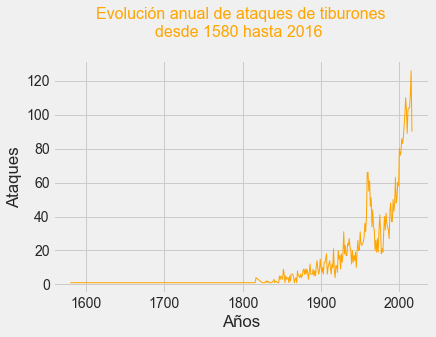

In [314]:
# Lo primero que me interesa ver es la evolución de ataques a lo largo de tiempo

año = shark.groupby('Year__c',as_index=True).agg({'Freq':'sum'})

plt.plot(año.index, año['Freq'], marker = '', color='orange', linewidth=1)

# plt.style.use('fivethirtyeight')
# plt.figure(figsize=(30, 15))

# Añado títulos
plt.title('Evolución anual de ataques de tiburones\ndesde 1580 hasta 2016 \n',fontsize=16, fontweight=0, color='orange')
plt.xlabel("Años")
plt.ylabel("Ataques")

plt.show()
# año['Year__c'].min()
# año['Year__c'].max()

Con la gráfica vemos que hasta el siglo XIX los registros son casi nulos por lo que podríamos no tenerlos en cuenta en futuros análisis. 

En el siguiente cuadro vemos que el <font color='red'>**92,5%**</font> de los ataques registrados se producen a partir de **1900**

In [315]:
bins = [1800,1850,1900,1950,2000,2050]
shark['Year_bin'] = pd.cut(shark['Year__c'],bins)
shark.head()
año_bin = shark.groupby('Year_bin',as_index=True).agg({'Freq':'sum'})
año_bin['share'] = año_bin.apply(lambda x: x/sum(x)*100)
año_bin.head()

/Users/mariaadradosreig/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Freq,share
Year_bin,,
"(1800, 1850]",40,0.870322
"(1850, 1900]",301,6.549173
"(1900, 1950]",777,16.906005
"(1950, 2000]",1935,42.101828
"(2000, 2050]",1543,33.572672


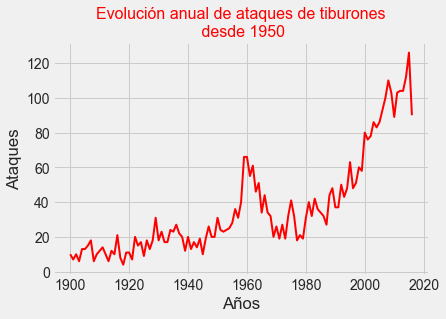

In [316]:
año_3 = año.loc[1900:,:]

# plt.plot(año)
plt.plot(año_3.index, año_3['Freq'], marker = '', color='Red', linewidth=2)

# Títulos
plt.title('Evolución anual de ataques de tiburones\n desde 1950', fontsize=16, fontweight=0, color='Red')
plt.xlabel("Años")
plt.ylabel("Ataques")
plt.show()

/Users/mariaadradosreig/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


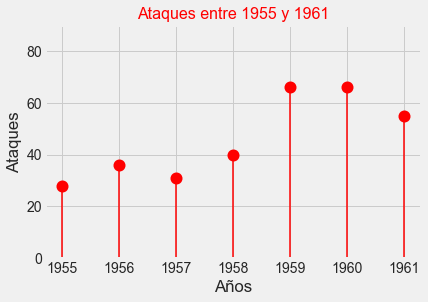

In [317]:
año_3 = año.loc[1955:1961,:]

(markers, stemlines, baseline) = plt.stem(año_3.index, año_3['Freq'])
plt.ylim(0, 90)
plt.setp(markers, markersize=10, color = 'red', markeredgecolor="red", markeredgewidth=2)
plt.setp(baseline, visible = False, linestyle="-", color="grey", linewidth=6)
plt.setp(stemlines, linestyle="-", color="red", linewidth=1.5 )

plt.title('Ataques entre 1955 y 1961', fontsize=16, fontweight=0, color='Red')
plt.xlabel("Años")
plt.ylabel("Ataques")
plt.show()

**¿Dónde se producen los ataques?**

El <font color='red'>**76%**</font> de los casos se producen entre <font color='red'>EEUU, Australia y Sudráfica.

,Freq,share
Country__c,,
BRAZIL,83,2.365346
PAPUA NEW GUINEA,83,2.365346
SOUTH AFRICA,414,11.798233
AUSTRALIA,646,18.409803
USA,1628,46.394984


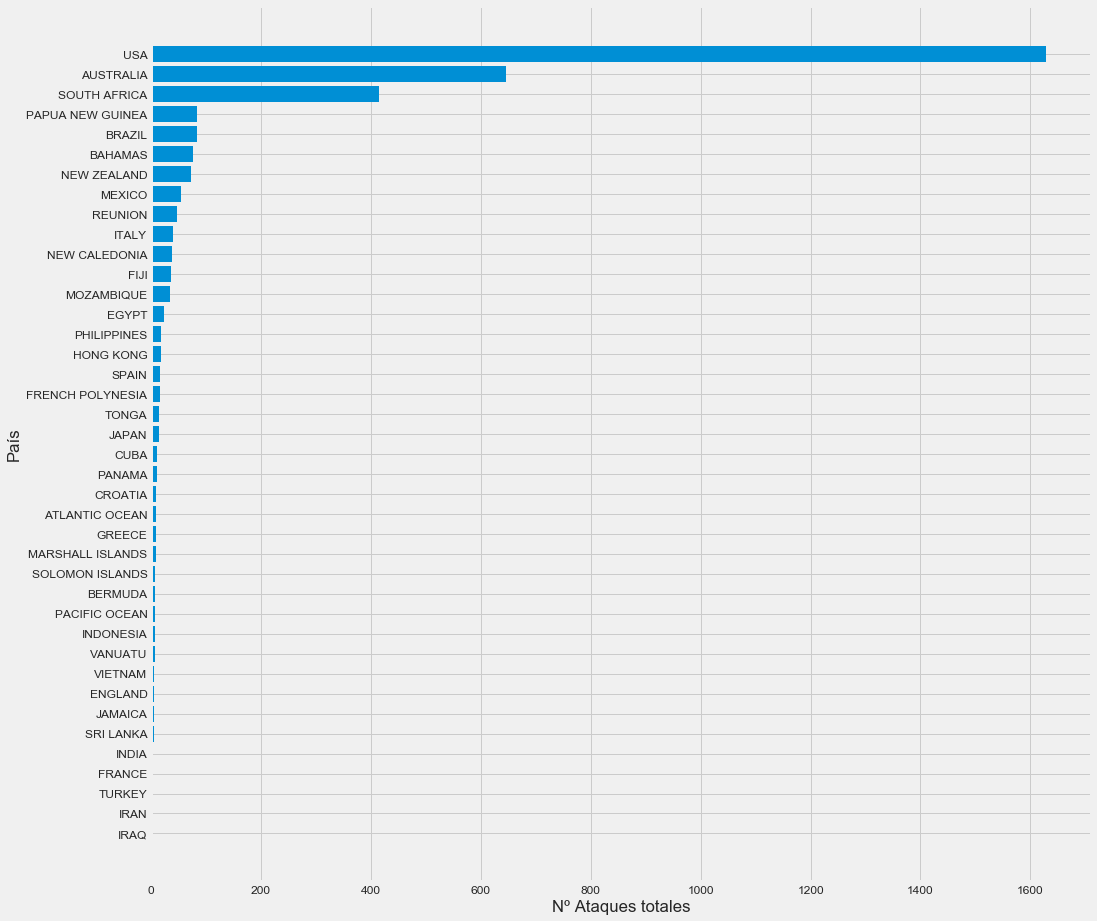

In [318]:
ranking = shark[(shark['Year__c']>=1950)].groupby('Country__c',as_index=True).agg({'Freq':'sum'}).sort_values(by=['Freq'], ascending=[True])

ranking['share'] = ranking.apply(lambda x: x/x.sum()*100)
display(ranking.tail())

plt.figure(figsize=(15, 15))
rects1 = plt.barh(ranking.index,ranking['Freq'])
# rects2 = plt.barh(ranking.index,ranking['share'])
plt.xlabel("Nº Ataques totales")
plt.ylabel("País")
plt.tick_params(labelsize = 12)
plt.show()

**¿Cómo se producen los ataques?**

En el siguiente mapa de calor podemos comprobar que la mayoría de casos se producen haciendo <font color='red'>**surf, pescando y nadando**.

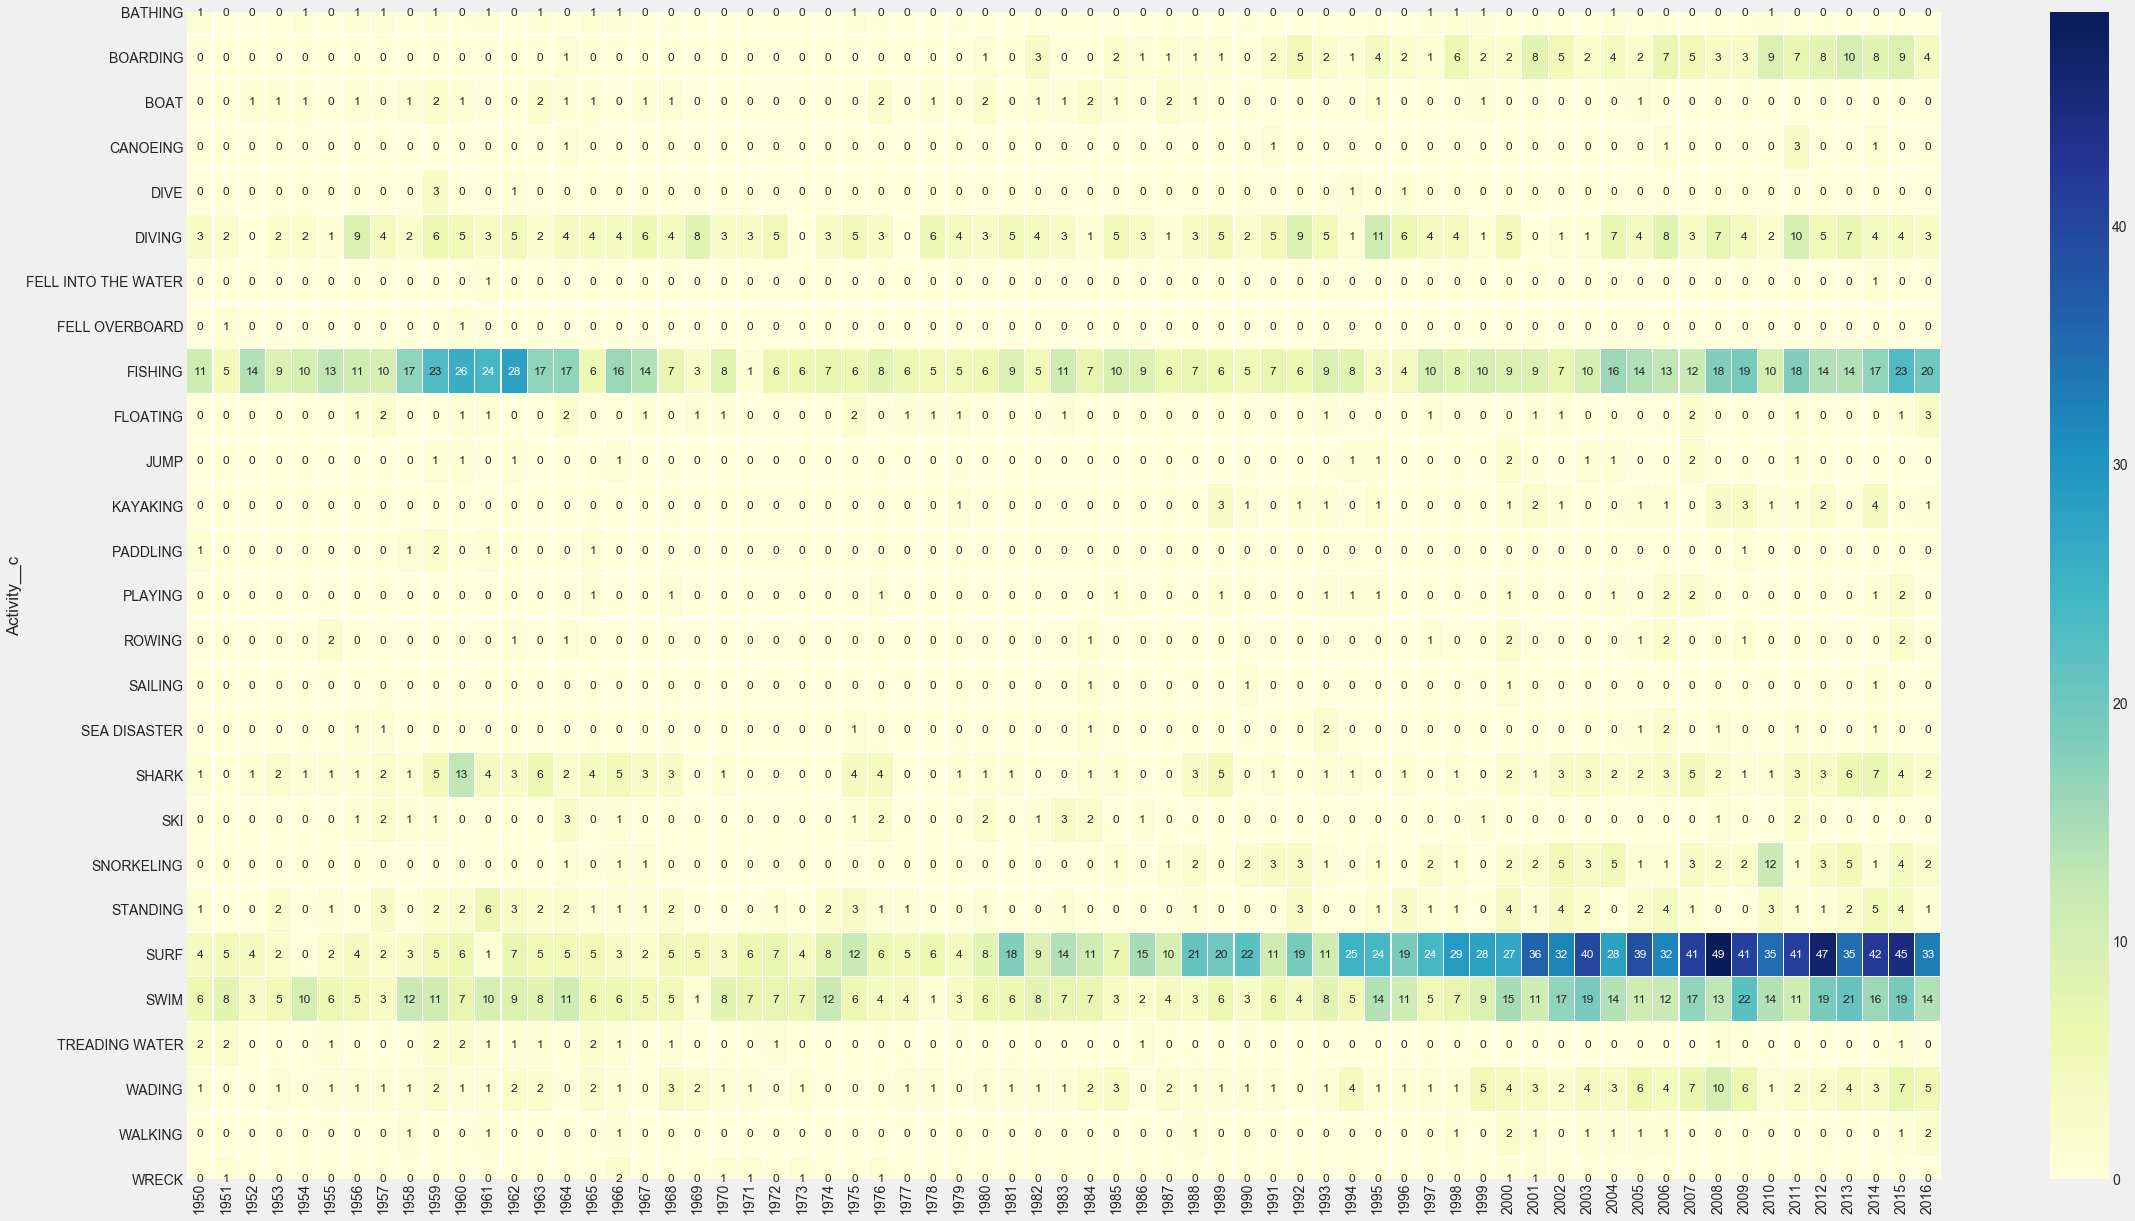

In [341]:
shark_act = shark[(shark['Year__c']>=1950)].pivot_table(index=['Activity__c'], columns = ['Year__c'], values = ['Freq'], aggfunc = [np.sum], fill_value = 0, dropna = True)
shark_act.columns = [int(i[2]) for i in shark_act.columns]
shark_act.reset_index()
plt.figure(figsize=(35, 20))
sns.heatmap(shark_act, cmap="YlGnBu", linewidths=0.1, linecolor='white', annot=True, annot_kws={"size": 12})
plt.show()

**¿Qué pasa en EEUU?** 🇺🇸

La mayoría de ataques se producen en **Florida a surfistas** 🏄‍♀️☀️🌴

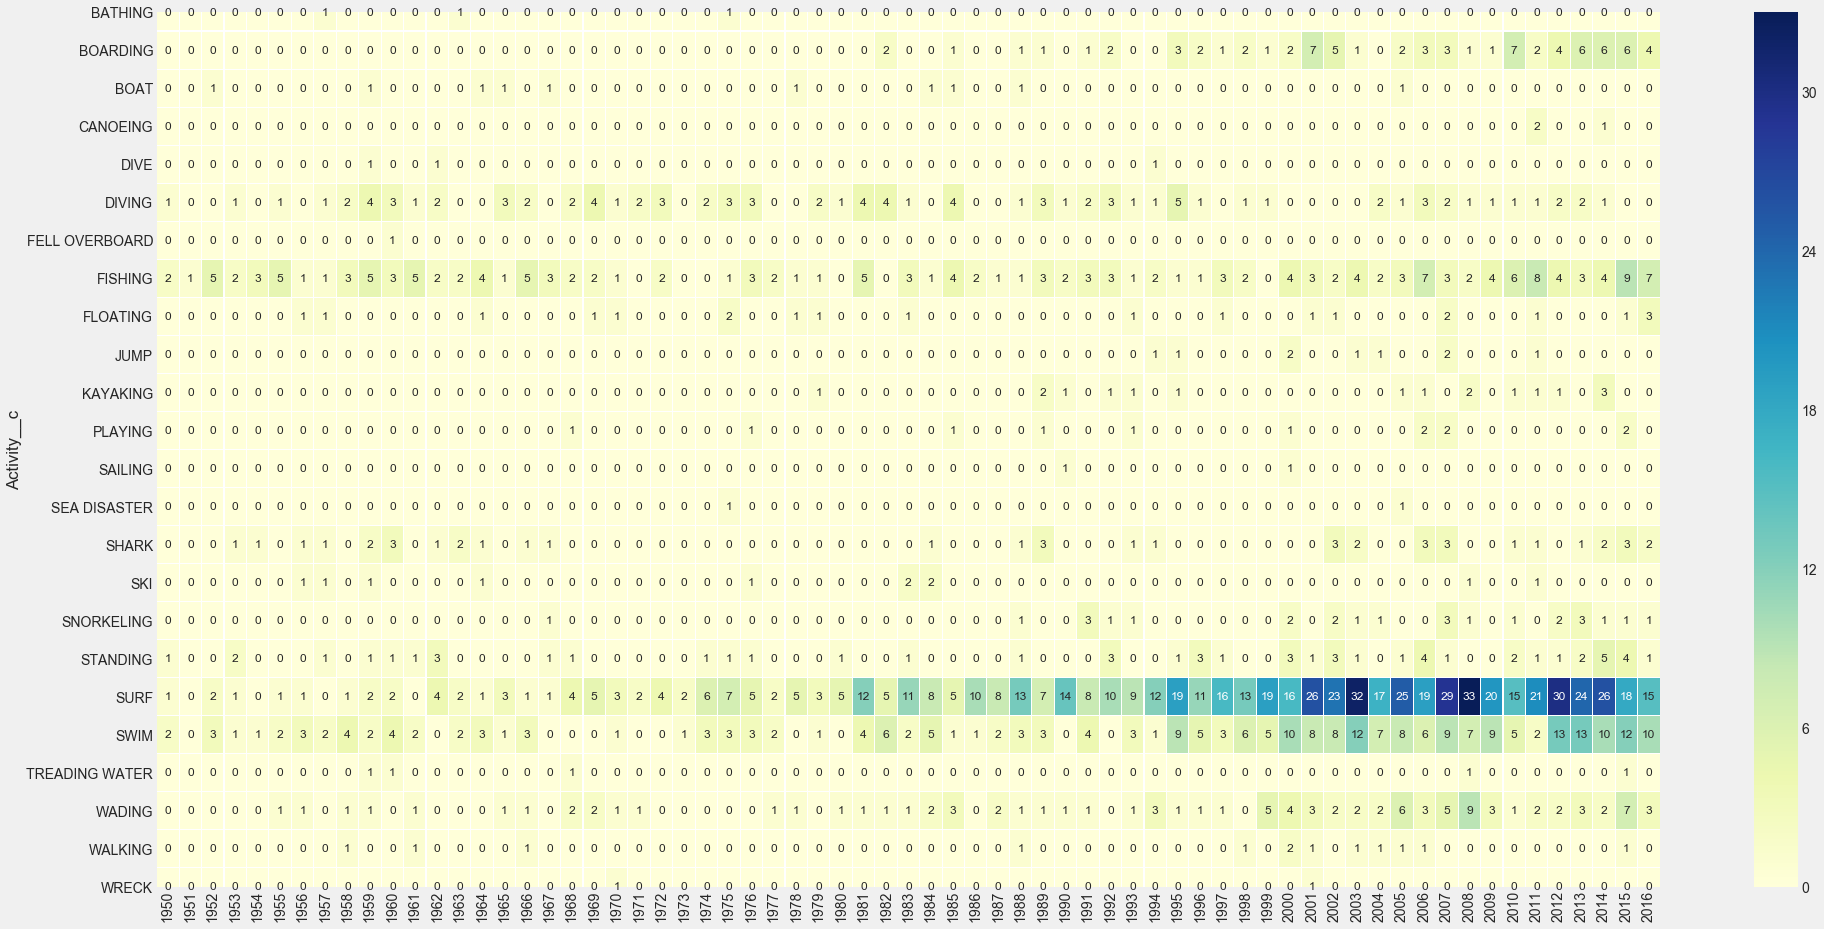

In [340]:
shark_USA = shark[(shark['Year__c']>=1950) & (shark['Country__c']== 'USA')].pivot_table(index=['Activity__c'], columns = ['Year__c'], values = ['Freq'], aggfunc = [np.sum], fill_value = 0, dropna = True)
shark_USA.columns = [int(i[2]) for i in shark_USA.columns]
shark_USA.reset_index()
plt.figure(figsize=(30, 15))
sns.heatmap(shark_USA, cmap="YlGnBu", linewidths=0.1, linecolor='white', annot=True, annot_kws={"size": 12})
plt.show()

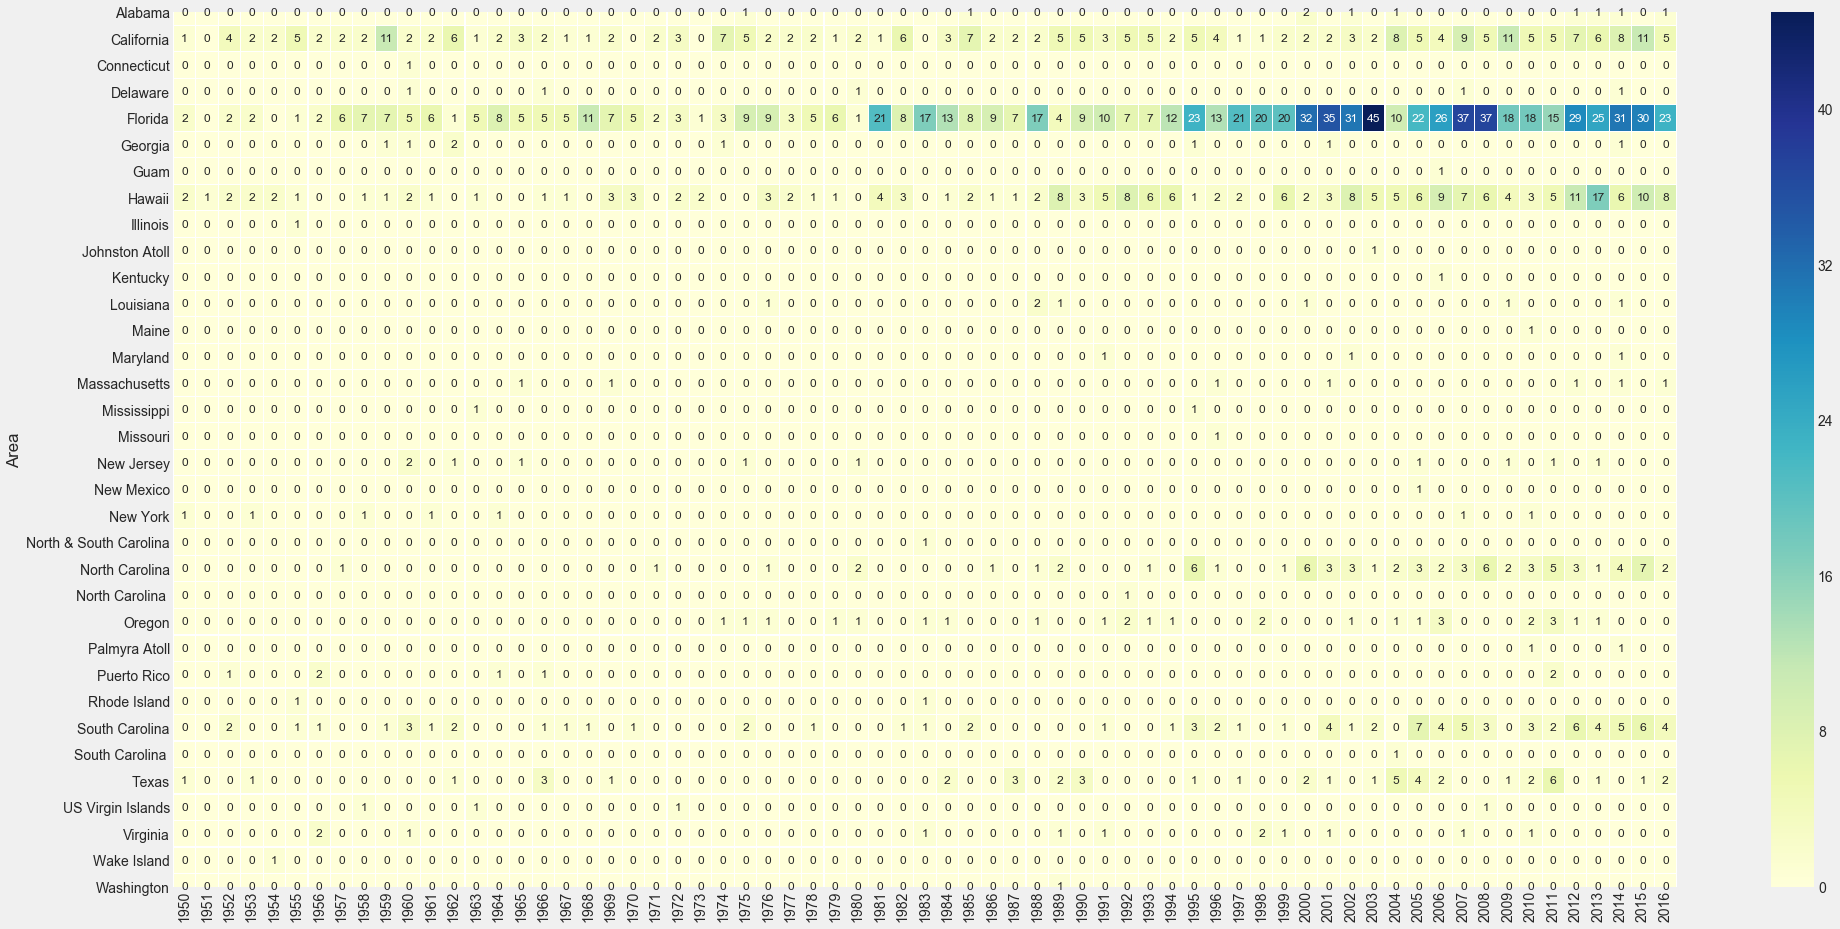

In [339]:
shark_USA_area = shark[(shark['Year__c']>=1950) & (shark['Country__c']== 'USA')].pivot_table(index=['Area'], columns = ['Year__c'], values = ['Freq'], aggfunc = [np.sum], fill_value = 0, dropna = True)
shark_USA_area.columns = [int(i[2]) for i in shark_USA_area.columns]
shark_USA_area.reset_index()
plt.figure(figsize=(30, 15))
sns.heatmap(shark_USA_area, cmap="YlGnBu", linewidths=0.1, linecolor='white', annot=True, annot_kws={"size": 12})
plt.show()

**¿Qué pasa en Australia?** 🇦🇺🦘

La mayoría de ataques se producen en **New South Wales a surfistas** 🏄‍♀️☀️🌴

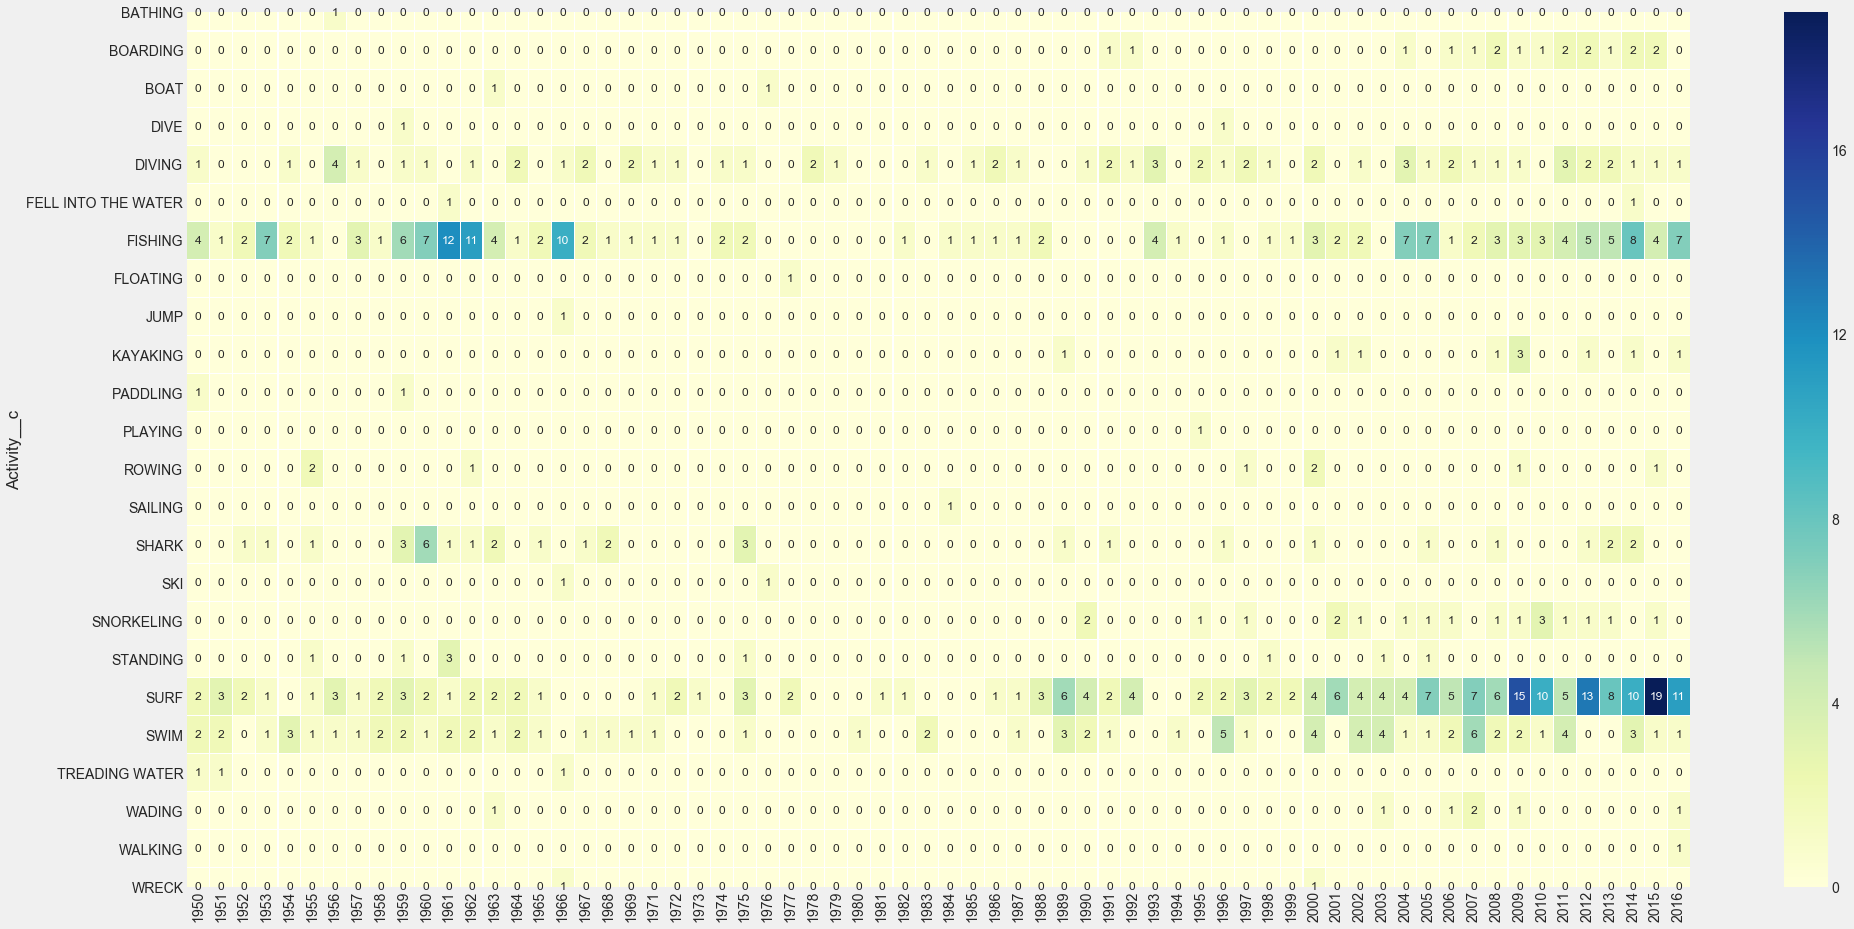

In [338]:
shark_Australia = shark[(shark['Year__c']>=1950) & (shark['Country__c']== 'AUSTRALIA')].pivot_table(index=['Activity__c'], columns = ['Year__c'], values = ['Freq'], aggfunc = [np.sum], fill_value = 0, dropna = True)
shark_Australia.columns = [int(i[2]) for i in shark_Australia.columns]
shark_Australia.reset_index()
plt.figure(figsize=(30, 15))
sns.heatmap(shark_Australia, cmap="YlGnBu", linewidths=0.1, linecolor='white', annot=True, annot_kws={"size": 12})
plt.show()

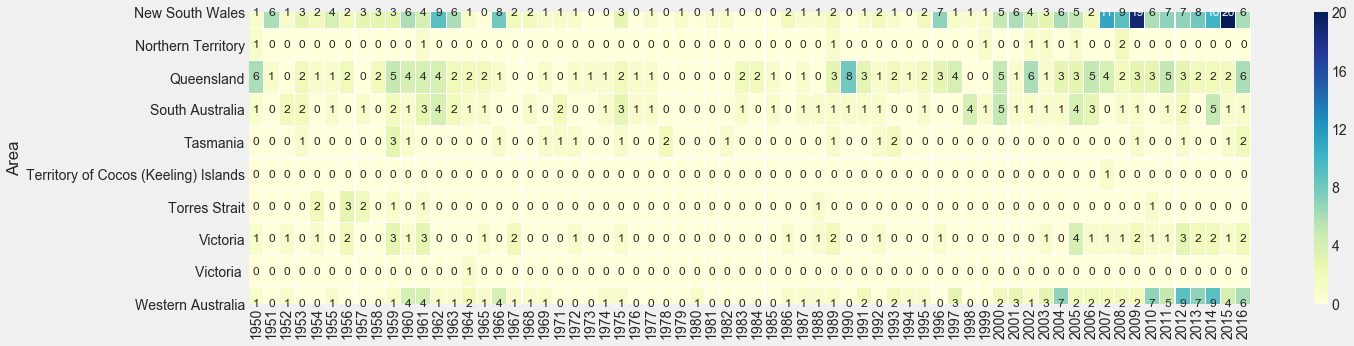

In [327]:
shark_AU_area = shark[(shark['Year__c']>=1950) & (shark['Country__c']== 'AUSTRALIA')].pivot_table(index=['Area'], columns = ['Year__c'], values = ['Freq'], aggfunc = [np.sum], fill_value = 0, dropna = True)
shark_AU_area.columns = [int(i[2]) for i in shark_AU_area.columns]
shark_AU_area.reset_index()
plt.figure(figsize=(20, 5))
sns.heatmap(shark_AU_area, cmap="YlGnBu", linewidths=0.1, linecolor='white', annot=True, annot_kws={"size": 12})
plt.show()

**¿En qué meses se producen más ataques?**

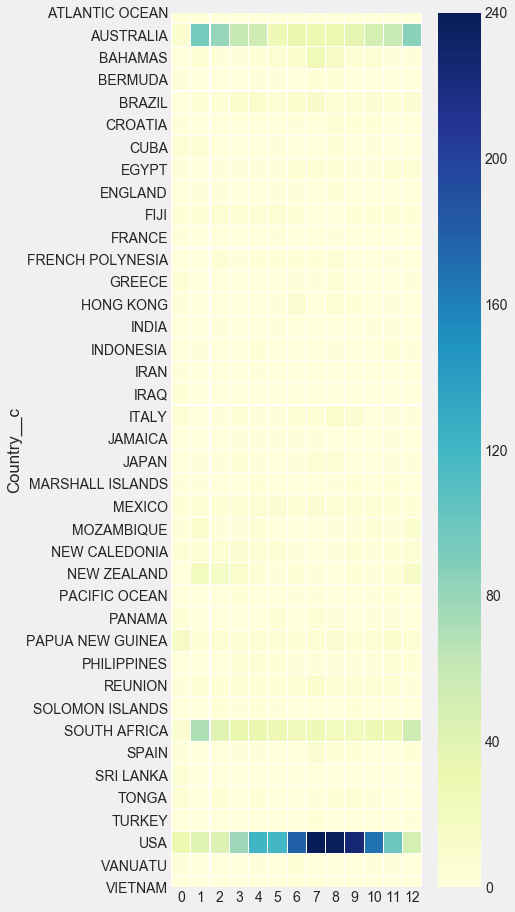

In [328]:
shark_mes = shark[(shark['Year__c']>=1950)].pivot_table(index=['Country__c'], columns = ['Month__c'], values = ['Freq'], aggfunc = [np.sum], fill_value = 0, dropna = True)
shark_mes.columns = [int(i[2]) for i in shark_mes.columns]
shark_mes.reset_index()
plt.figure(figsize=(5, 15))
sns.heatmap(shark_mes, cmap="YlGnBu", linewidths=0.1, linecolor='white', annot=False, annot_kws={"size": 10})
plt.show()

# `Conclusión`

##  <font color='grey'>Si te gusta el surf 🌊 hazlo con mucha precaución en <font color='blue'> Florida en verano </font>⛱  y en <font color='green'>Australia en Navidad </font>🎄!

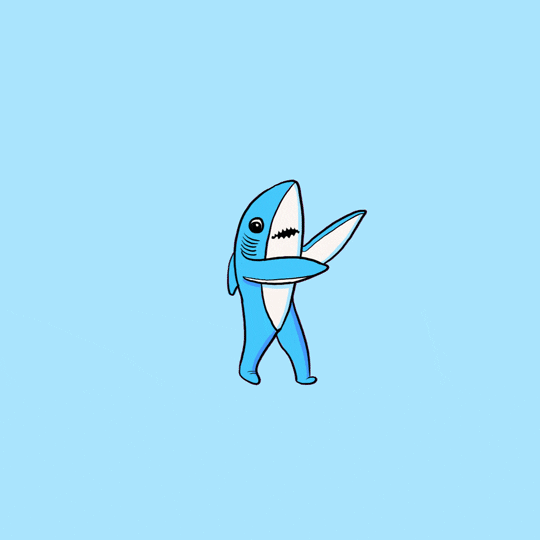

In [337]:
from IPython.display import Image
with open('./Input/giphy.gif','rb') as file:
    display(Image(file.read()))